# Creating Mongo DB

In [26]:
import pymongo
from bson import ObjectId, json_util
import json

In [27]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["startUps"]
mycol = mydb["companies"]

In [61]:
mycol2 = mydb["unis"]

# Insert many

In [64]:
import json
  
f = open('json_data.json')
data = json.load(f)
data[-1]

{'id': 3000,
 'company_name': 'Bitwave',
 'headline': 'Enterprise Digital Asset Platform',
 'tags': ['Recently funded'],
 'website': 'https://www.bitwave.io/',
 'employees': '11-50',
 'about': 'Bitwave has a complete back-office solution for businesses that use crypto. We offer accounting platform integrations and crypto tax tracking, an enterprise multi-sig wallet, and more.',
 'locations': ['San Francisco'],
 'industries': ['SaaS',
  'Enterprise Software',
  'Accounting',
  'Finance Technology',
  'Cryptocurrency',
  'Blockchains',
  'Fin Tech',
  'Blockchain / Cryptocurrency'],
 'jobs': {'Engineering': 4, 'Marketing': 1}}

In [65]:
f = open('schoolinfo.json')
data2 = json.load(f)
data2[0]

{'rankingNoteText': None,
 'nonResponderText': None,
 'nonResponder': False,
 'act-avg': 32,
 'primaryPhoto': 'https://www.usnews.com/img/college-photo_31291.jpg',
 'primaryPhotoThumb': 'https://www.usnews.com/img/college-photo_31291_170x170mm.jpg',
 'sat-avg': 1400,
 'enrollment': 5400,
 'city': 'Princeton',
 'sortName': 'princetonuniversity',
 'zip': '08544',
 'rankingNoteCharacter': None,
 'acceptance-rate': 7,
 'rankingDisplayScore': '100',
 'percent-receiving-aid': 60,
 'cost-after-aid': 16793.0,
 'state': 'NJ',
 'rankingSortRank': 1,
 'hs-gpa-avg': 3.9,
 'urlName': 'princeton-university',
 'rankingDisplayName': 'National Universities',
 'rankingDisplayRank': '#1',
 'ranking': 'overall',
 'xwalkId': '186131',
 'rankingIsTied': False,
 'isPublic': True,
 'businessRepScore': None,
 'tuition': 47140,
 'engineeringRepScore': 4.1,
 'displayName': 'Princeton University',
 'schoolType': 'national-universities',
 'region': None,
 'aliasNames': None,
 'rankingType': 'national-universities'

In [66]:
x = mycol2.insert_many(data2)

### Проверим, что все ок (ﾉ≧∀≦)ﾉ ‥…━━━★

In [34]:
x = mycol.find_one()
print(x)

{'_id': ObjectId('641f6511ac53a0b987b5b555'), 'id': 1, 'company_name': 'Forward Networks', 'headline': 'Network automation software for a stronger, more reliable network. realize network assurance', 'tags': ['Actively Hiring', 'Highly rated', 'Growing fast', 'Recently funded', 'Same investor as Airbnb', 'Work / Life Balance', 'Strong Leadership'], 'website': 'http://www.forwardnetworks.com/', 'employees': '11-50', 'about': 'The software used to manage networks hasn’t kept up with the dramatic expansion of networks themselves. The Forward Networks solution is designed to help network teams eliminate network outages and reduce time to remediate errors. Its platform enables engineers and operators to visualize and search complex networks, debug configuration problems, verify network-wide policy implementations, and predict network behavior prior to deploying changes. Forward Networks builds a software replica of an entire network to analyze its behavior. Using the network copy, the softwa

In [67]:
x = mycol2.find_one()
print(x)

{'_id': ObjectId('641f79d5ac53a0b987b5c10f'), 'rankingNoteText': None, 'nonResponderText': None, 'nonResponder': False, 'act-avg': 32, 'primaryPhoto': 'https://www.usnews.com/img/college-photo_31291.jpg', 'primaryPhotoThumb': 'https://www.usnews.com/img/college-photo_31291_170x170mm.jpg', 'sat-avg': 1400, 'enrollment': 5400, 'city': 'Princeton', 'sortName': 'princetonuniversity', 'zip': '08544', 'rankingNoteCharacter': None, 'acceptance-rate': 7, 'rankingDisplayScore': '100', 'percent-receiving-aid': 60, 'cost-after-aid': 16793.0, 'state': 'NJ', 'rankingSortRank': 1, 'hs-gpa-avg': 3.9, 'urlName': 'princeton-university', 'rankingDisplayName': 'National Universities', 'rankingDisplayRank': '#1', 'ranking': 'overall', 'xwalkId': '186131', 'rankingIsTied': False, 'isPublic': True, 'businessRepScore': None, 'tuition': 47140, 'engineeringRepScore': 4.1, 'displayName': 'Princeton University', 'schoolType': 'national-universities', 'region': None, 'aliasNames': None, 'rankingType': 'national-u

# Insert one

Создадим мок-объект для записи 

In [47]:
my_mock = {'id': 3001,
     'company_name': 'MemeAI',
     'headline': 'Generating memes',
     'tags': ['Actively Hiring',
      'Highly rated'
      'Strong Leadership'],
     'website': 'http://www.forwardnetworks.com/',
     'employees': '11-50',
     'about': 'Stonks hehe',
     'locations': ['Palo Alto'],
     'industries': ['Enterprise Software',
      'Information Technology',
      'Networking',
      'Software',
      'Computers'],
     'jobs': {'Product Memeger': 1}}

In [48]:
x = mycol.insert_one(my_mock)

In [49]:
print(x.inserted_id)

641f71d4ac53a0b987b5c10e


# Filter

In [50]:
query = { 'company_name': 'MemeAI' }
mydoc = mycol.find(query)

for x in mydoc:
    print(x)

{'_id': ObjectId('641f71d4ac53a0b987b5c10e'), 'id': 3001, 'company_name': 'MemeAI', 'headline': 'Generating memes', 'tags': ['Actively Hiring', 'Highly ratedStrong Leadership'], 'website': 'http://www.forwardnetworks.com/', 'employees': '11-50', 'about': 'Stonks hehe', 'locations': ['Palo Alto'], 'industries': ['Enterprise Software', 'Information Technology', 'Networking', 'Software', 'Computers'], 'jobs': {'Product Memeger': 1}}


# Update

Воообще, по заголовку делать так не всегда подойдет - если сметчится больше одного раза, то апдейт ниже применится только к первому метчу (если нужно все, то update many, но я не хочу ломать данные)

In [54]:
query = { 'headline': 'Generating memes' }
newvals = { '$set': { 'headline': 'Generating SUPER FUNNY memes' } }

mycol.update_one(query, newvals)

In [55]:
query = { 'company_name': 'MemeAI' }
mydoc = mycol.find(query)

for x in mydoc:
    print(x)

{'_id': ObjectId('641f71d4ac53a0b987b5c10e'), 'id': 3001, 'company_name': 'MemeAI', 'headline': 'Generating SUPER FUNNY memes', 'tags': ['Actively Hiring', 'Highly ratedStrong Leadership'], 'website': 'http://www.forwardnetworks.com/', 'employees': '11-50', 'about': 'Stonks hehe', 'locations': ['Palo Alto'], 'industries': ['Enterprise Software', 'Information Technology', 'Networking', 'Software', 'Computers'], 'jobs': {'Product Memeger': 1}}


# Delete

Удалим внесенную нами ранее выдуманную IT компанию ♨o(>_<)o♨

In [56]:
query = { 'company_name': 'MemeAI' }
mycol.delete_one(query)

Теперь возьмем и прооверим по айди 乁( • ω •乁) 

In [57]:
query = { 'id': 3001 }
mydoc = mycol.find(query)

for x in mydoc:
    print(x)

Ура все удалилось!

# Запросы

### Regexp

(￣▽￣)ノ

Сколько стартапоы со статусом Actively Hiring?

In [128]:
query = { "tags": { "$regex": 'Actively Hiring', "$options" :'i' } }
res = mycol.count_documents(query)
res

2546

Какие стартапы связаны с криптой? Ограничим вывод до 6

In [337]:
query = {
    '$or':
        [
            {'about':{'$regex':'crypto'}},
            {'about':{'$regex':'bitcoin'}}
        ]
}
mydoc = mycol.find(query).sort("id", 1).limit(6)
for x in mydoc:
    print(x['company_name'])

Chainalysis
Ripple
WalletConnect
Keyp
Messari
Immuna


Выведем университеты, название которых начинается с "M" и при этом private institutionalControl

In [357]:
query = {
    '$and':
        [
            {'displayName': {'$regex':'^M'}},
            {'institutionalControl':{'$regex':'private'}}
        ]
}
mydoc = mycol2.find(query).sort("id", 1).limit(5)
for x in mydoc:
    print(x['displayName'])

Massachusetts Institute of Technology
Marquette University
Mercer University
Maryville University of St. Louis


### Sort

(^_<)〜☆

Выведем названия компаний, которые указали remote-friendly в описании и отсортируем по убыванию  id

In [159]:
query = ({'about':{'$regex':'remote-friendly'}})
mydoc = mycol.find(query).sort("id", -1)
for x in mydoc:
    print(x['company_name'])

Loyal
Vantage
Radar
Gordian Software (YC W19)


### Limit

‿︵‿︵‿︵‿ヽ(°□° )ノ︵‿︵‿︵‿︵

Выведем, сколько позиций дизайнера в Фин-Техе, ограничив вывод 2 

In [171]:
match = {
   "$match": {
         "industries": "Fin Tech"
   }
}

# Ограничим вывод 2 документами
limit = { "$limit": 2 }

pipeline = [
   match, 
   limit,
]
results = mycol.aggregate(pipeline)

In [172]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

for r in results:
    pp.pprint(" Всего позиций: {jobs}, Локация: {locations}, Индустрии: {ind}".format(
         jobs=r["jobs"]['Designer'],
         locations=r["locations"][0],
         ind=r['industries']
   ))
    print('----------(〜￣△￣)〜-----------')

(" Всего позиций: 13, Локация: New York City, Индустрии: ['Financial "
 "Services', 'Consumers', 'Payments', 'Peer-to-Peer', 'Finance', 'P2P Money "
 "Transfer', 'Fin Tech']")
----------(〜￣△￣)〜-----------
(" Всего позиций: 1, Локация: Palo Alto, Индустрии: ['Financial Services', "
 "'E-Commerce', 'Payments', 'Mobile Payments', 'Fin Tech']")
----------(〜￣△￣)〜-----------


### Join

(╮°-°)╮┳━━┳ ( ╯°□°)╯ ┻━━┻

Выведем названия университетов и скор по бизнесу, которые там же, где стартапы, где есть вакансии Accounting (сами названия компаний тоже принтим)

In [307]:
q = mycol.aggregate([
    {
        '$lookup': {
            'from': 'unis', 
            'localField': "locations", 
            'foreignField': "city", 
            'as': 'joinedResult'
        }},          
    {"$unwind": "$joinedResult"},
    {"$match": {
         "industries": "Accounting"
   }},
])
for i in q:
    print(f"Компания: {i['company_name']}, Университет: {i['joinedResult']['displayName']}, "
          f"businessRepScore: {i['joinedResult']['businessRepScore']}")

Компания: AppZen, Университет: Arizona State University--Tempe, businessRepScore: 3.6
Компания: Wholesail, Университет: University of San Francisco, businessRepScore: 2.8
Компания: Wholesail, Университет: San Francisco State University, businessRepScore: 2.5
Компания: Wholesail, Университет: California Institute of Integral Studies, businessRepScore: None
Компания: FloQast, Университет: University of California--Los Angeles, businessRepScore: None
Компания: FloQast, Университет: University of Southern California, businessRepScore: 4.1
Компания: FloQast, Университет: Ohio State University--Columbus, businessRepScore: 3.8
Компания: Fonteva, Университет: Virginia Commonwealth University, businessRepScore: 2.7
Компания: Fonteva, Университет: University of Texas--Arlington, businessRepScore: 2.7
Компания: ShoppinPal, Университет: University of San Francisco, businessRepScore: 2.8
Компания: ShoppinPal, Университет: San Francisco State University, businessRepScore: 2.5
Компания: ShoppinPal, У

### Group

☆*:.｡.o(≧▽≦)o.｡.:*☆

Выведем средние GPA с группировкой по штатам и отсортируем по GPA

In [243]:
agg_result= mycol2.aggregate(
    [{
    "$group" : 
        {"_id" : "$state", 
         "AVG GPA" : {"$avg" : "$hs-gpa-avg"}
         }},
        { "$sort" : { "AVG GPA" : -1 } }
    ])

state, gpa = [], []
for i in agg_result:
    if i['AVG GPA']:
        state.append(i['_id'])
        gpa.append(i['AVG GPA'])
        #print(f"Штат: {i['_id']}, Avg.GPA: {i['AVG GPA']}")

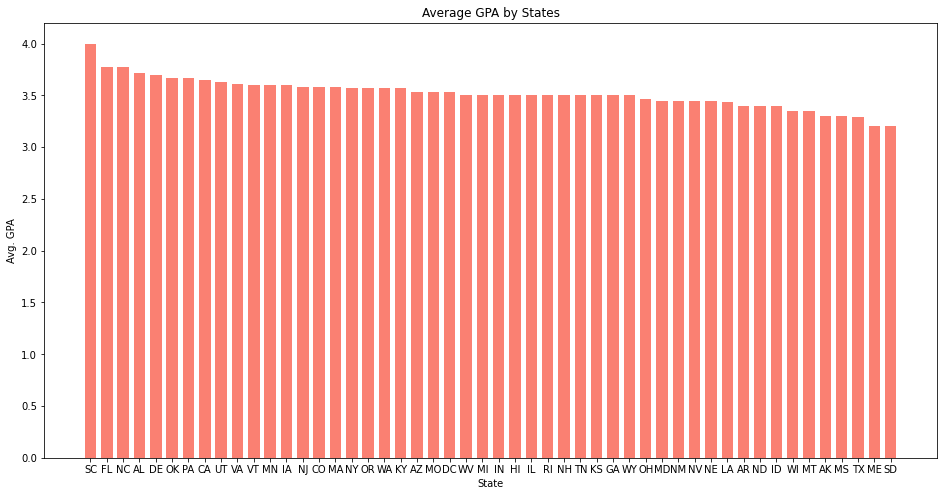

In [261]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16, 8))
plt.bar(state, gpa, color ='salmon',
        width = 0.7)
 
plt.xlabel("State")
plt.ylabel("Avg. GPA")
plt.title("Average GPA by States")
plt.show()